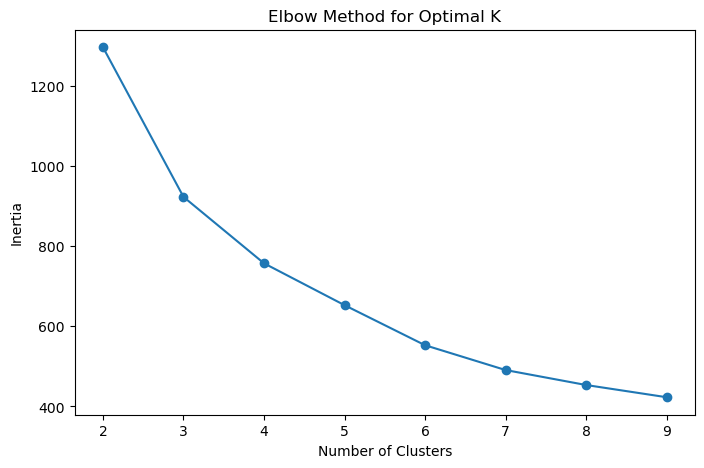

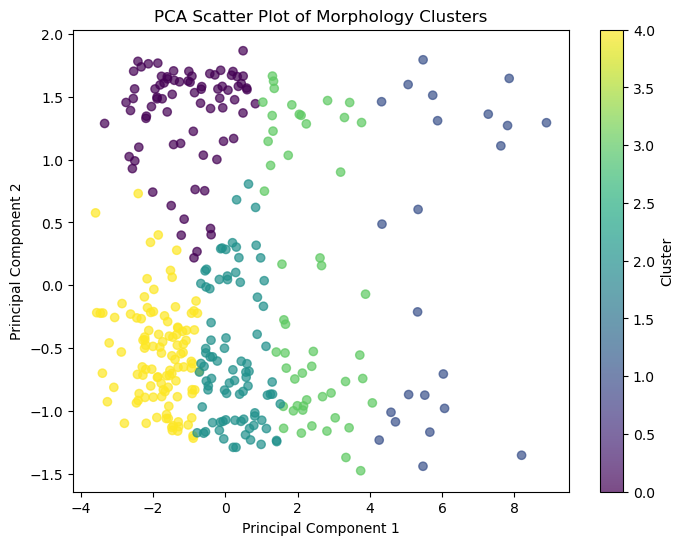

area               perimeter            aspect_ratio  \
                mean         std        mean        std         mean   
cluster                                                                
0        1168.662338  386.133826  142.426280  30.973933     2.111228   
1        3455.826087  717.716876  392.864576  60.698628     7.227957   
2        1600.383721  330.875600  185.807908  22.332058     3.087824   
3        2352.942308  583.207675  258.575531  35.935308     4.437846   
4         890.412844  269.128883  120.026542  22.636811     1.870611   

                  circularity            solidity            \
              std        mean       std      mean       std   
cluster                                                       
0        0.609021    0.725932  0.110349  0.943495  0.031523   
1        1.755254    0.286579  0.051214  0.778410  0.076568   
2        0.617279    0.583238  0.076137  0.936051  0.027535   
3        0.884161    0.442618  0.073514  0.900257  0.040605   
4        0.379238    0.768480  0.077995  0.953549  0.012829   

        equivalent_diameter           orientation            
                       mean       std        mean       std  
cluster                                                      
0                 38.022843  6.542661    1.134715  0.415719  
1                 66.002354  6.765637    0.034740  1.272826  
2                 44.895694  4.723128   -0.820861  0.576402  
3                 54.315205  6.827451   -0.139683  1.098475  
4                 33.224860  5.485762   -0.920962  0.403512

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the CSV file
df = pd.read_csv('../src/kmeans/heyo.csv')

# Drop non-numeric and irrelevant columns
if 'assigned_class' in df.columns:
    df = df.drop(columns=['assigned_class'])  # Ignore manual classifications

# Select relevant morphology metrics
features = ['area', 'perimeter', 'aspect_ratio', 'circularity', 'solidity', 'equivalent_diameter', 'orientation']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the elbow method
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit KMeans with optimal K (to be chosen based on the elbow graph)
optimal_k = 5  # We will adjust this based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Compute cluster statistics
cluster_stats = df.groupby('cluster')[features].agg(['mean', 'std'])

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

# Plot PCA Scatter
plt.figure(figsize=(8, 6))
plt.scatter(df['PC1'], df['PC2'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of Morphology Clusters')
plt.show()

# Display cluster statistics
display(cluster_stats)


In [3]:
import pandas as pd

# Load dataset
df = pd.read_excel("/Users/user/Downloads/ideal dset.xlsx")

# Display first few rows
df.head()


,ID,area,perimeter,equivalent_diameter,orientation,aspect_ratio,circularity,solidity,assigned_class
0,12,1732,329.279221,46.960099,-1.326259,5.020826,0.200738,0.563802,Elongated
1,159,1933,256.225397,49.610201,-1.485122,5.577445,0.369996,0.883859,Elongated
2,476,318,75.941125,20.121883,0.998869,1.749138,0.692920,0.876033,Elongated
3,14,412,79.455844,22.903596,1.383013,1.811012,0.820078,0.971698,Elongated
4,516,469,94.041631,24.436639,1.564839,2.805850,0.666411,0.955193,Elongated


In [8]:
df.isnull().sum()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   22 non-null     int64  
 1   area                 22 non-null     int64  
 2   perimeter            22 non-null     float64
 3   equivalent_diameter  22 non-null     float64
 4   orientation          22 non-null     float64
 5   aspect_ratio         22 non-null     float64
 6   circularity          22 non-null     float64
 7   solidity             22 non-null     float64
 8   assigned_class       22 non-null     object 
dtypes: float64(6), int64(2), object(1)
memory usage: 1.7+ KB


,ID,area,perimeter,equivalent_diameter,orientation,aspect_ratio,circularity,solidity
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,117.590909,1299.863636,197.723465,36.355142,-0.003710,3.283143,0.541166,0.867827
std,133.554932,1317.733490,164.442036,18.687291,1.186197,1.919796,0.264252,0.113029
min,12.000000,129.000000,42.041631,12.815924,-1.485122,1.177734,0.148275,0.563802
25%,32.250000,481.500000,94.127417,24.754042,-1.165111,1.890135,0.308808,0.819421
50%,87.000000,653.000000,128.547727,28.833020,-0.157374,2.562275,0.578382,0.911081
75%,152.750000,1811.500000,264.045202,48.021846,1.159510,4.672913,0.719846,0.945928
max,516.000000,5247.000000,665.511760,81.735475,1.564839,8.342789,0.958320,0.979964


In [19]:
df.groupby("assigned_class").agg({
    "area": ["mean", "std", "min", "max"],
    "perimeter": ["mean", "std", "min", "max"],
    "equivalent_diameter": ["mean", "std"],
    "aspect_ratio": ["mean", "std"],
    "circularity": ["mean", "std"],
    "solidity": ["mean", "std"]
})


area                           perimeter              \
                       mean          std  min   max        mean         std   
assigned_class                                                                
Elongated        972.800000   789.848530  318  1933  166.988644  117.871050   
Normal          2145.125000  1784.708415  137  5247  293.901434  224.887803   
Round            726.666667   648.919358  207  1454  107.383093   55.469103   
Small            732.000000   576.170461  129  1838  140.268711   76.288924   

                                      equivalent_diameter             \
                      min         max                mean        std   
assigned_class                                                         
Elongated       75.941125  329.279221           32.806484  14.245265   
Normal          42.384776  665.511760           47.322756  23.708100   
Round           52.627417  163.539105           28.322474  13.586290   
Small           42.041631  266.651804           28.705205  11.385388   

               aspect_ratio           circularity            solidity  \
                       mean       std        mean       std      mean   
assigned_class                                                          
Elongated          3.392854  1.800787    0.550029  0.255590  0.850117   
Normal             3.806287  2.560782    0.471823  0.308127  0.856021   
Round              2.088393  0.891747    0.734336  0.184672  0.923017   
Small              3.091564  1.426942    0.529651  0.253257  0.870732   

                          
                     std  
assigned_class            
Elongated       0.165537  
Normal          0.121237  
Round           0.035527  
Small           0.090985

In [20]:
# Define ideal ranges for each class based on mean ± std
ideal_metrics = {
    "Elongated": {
        "area": (972.8 - 789.85, 972.8 + 789.85),
        "aspect_ratio": (3.39 - 1.80, 3.39 + 1.80),
        "circularity": (0.55 - 0.25, 0.55 + 0.25),
        "solidity": (0.85 - 0.16, 0.85 + 0.16)
    },
    "Normal": {
        "area": (2145.12 - 1784.71, 2145.12 + 1784.71),
        "aspect_ratio": (3.80 - 2.56, 3.80 + 2.56),
        "circularity": (0.47 - 0.30, 0.47 + 0.30),
        "solidity": (0.85 - 0.12, 0.85 + 0.12)
    },
    "Round": {
        "area": (726.67 - 648.92, 726.67 + 648.92),
        "aspect_ratio": (2.08 - 0.89, 2.08 + 0.89),
        "circularity": (0.73 - 0.18, 0.73 + 0.18),
        "solidity": (0.92 - 0.04, 0.92 + 0.04)
    },
    "Small": {
        "area": (732 - 576.17, 732 + 576.17),
        "aspect_ratio": (3.09 - 1.42, 3.09 + 1.42),
        "circularity": (0.52 - 0.25, 0.52 + 0.25),
        "solidity": (0.87 - 0.09, 0.87 + 0.09)
    }
}

import pprint
pprint.pprint(ideal_metrics)


{'Elongated': {'area': (182.94999999999993, 1762.65),
               'aspect_ratio': (1.59, 5.19),
               'circularity': (0.30000000000000004, 0.8),
               'solidity': (0.69, 1.01)},
 'Normal': {'area': (360.40999999999985, 3929.83),
            'aspect_ratio': (1.2399999999999998, 6.359999999999999),
            'circularity': (0.16999999999999998, 0.77),
            'solidity': (0.73, 0.97)},
 'Round': {'area': (77.75, 1375.59),
           'aspect_ratio': (1.19, 2.97),
           'circularity': (0.55, 0.9099999999999999),
           'solidity': (0.88, 0.9600000000000001)},
 'Small': {'area': (155.83000000000004, 1308.17),
           'aspect_ratio': (1.67, 4.51),
           'circularity': (0.27, 0.77),
           'solidity': (0.78, 0.96)}}


In [21]:
def classify_cell_using_ideal(cell_metrics):
    """
    Classifies a cell by comparing its morphology metrics to the ideal ranges.
    
    Parameters:
    - cell_metrics: dict, contains metrics like area, aspect_ratio, circularity, solidity.

    Returns:
    - str, the assigned class.
    """
    best_match = None
    max_matching_features = 0

    for class_name, thresholds in ideal_metrics.items():
        matching_features = sum(
            thresholds[metric][0] <= cell_metrics[metric] <= thresholds[metric][1]
            for metric in thresholds
        )

        if matching_features > max_matching_features:
            max_matching_features = matching_features
            best_match = class_name

    return best_match if best_match else "Deformed"  # Default if no match

# Apply classification to dataset
df["classified_class"] = df.apply(lambda row: classify_cell_using_ideal(row.to_dict()), axis=1)

# Show new classifications
df[["ID", "assigned_class", "classified_class"]]


,ID,assigned_class,classified_class
0,12,Elongated,Normal
1,159,Elongated,Normal
2,476,Elongated,Elongated
3,14,Elongated,Elongated
4,516,Elongated,Elongated
5,13,Normal,Elongated
6,33,Normal,Normal
7,78,Normal,Elongated
8,39,Normal,Normal
9,25,Normal,Normal


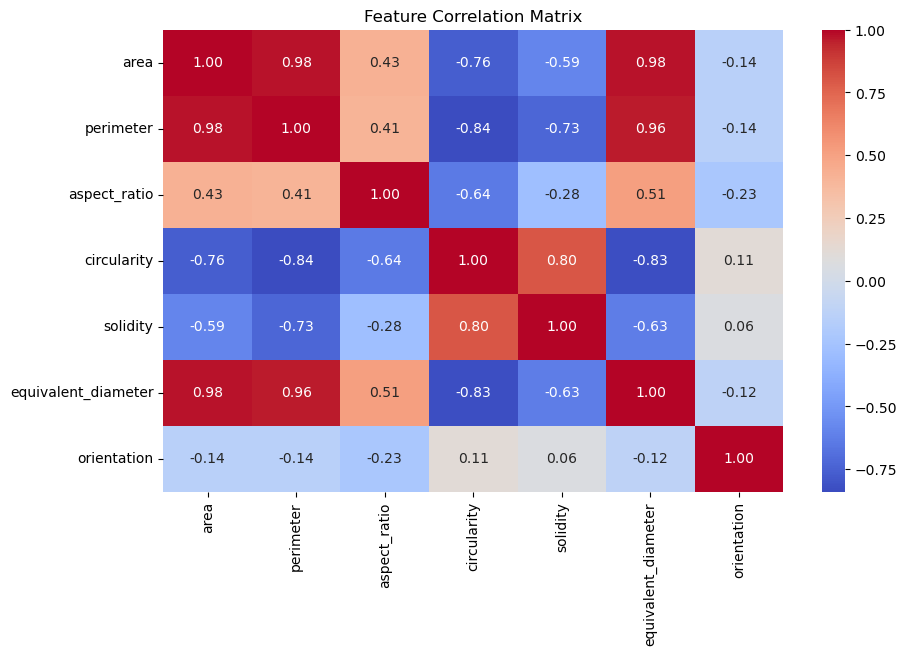

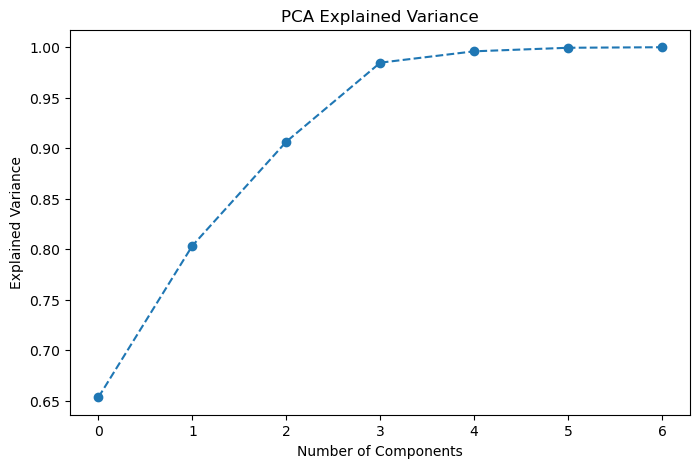

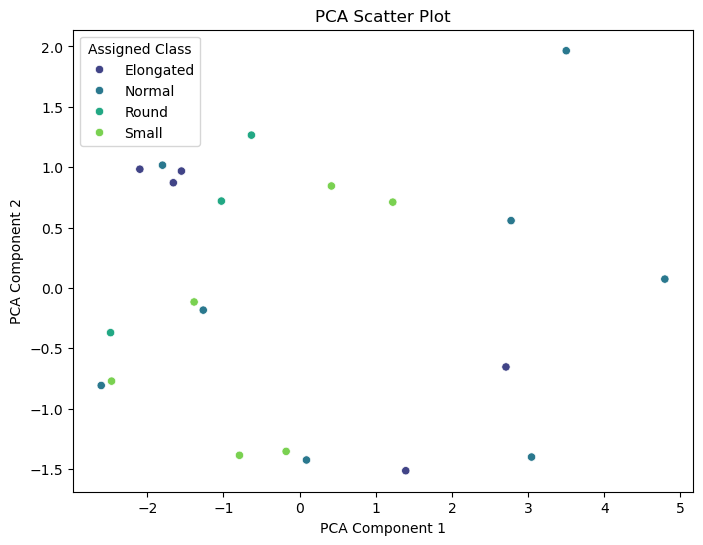

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
ideal_df = pd.read_excel("/Users/user/Downloads/ideal dset.xlsx")

# Extract relevant morphology metrics
features = ['area', 'perimeter', 'aspect_ratio', 'circularity', 'solidity', 'equivalent_diameter', 'orientation']
X_ideal = ideal_df[features]

# Normalize the values
scaler = StandardScaler()
X_ideal_scaled = scaler.fit_transform(X_ideal)

# Correlation Matrix to analyze feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X_ideal_scaled, columns=features).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# PCA Analysis
pca = PCA()
pca_components = pca.fit_transform(X_ideal_scaled)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# Choose the first 2 PCA components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_ideal_scaled)

# Scatter plot of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=ideal_df['assigned_class'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot')
plt.legend(title="Assigned Class")
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "/Users/user/Downloads/ideal dset.xlsx"  # Change this to your file path
df = pd.read_excel(file_path)

# Features used for clustering
features = ['area', 'perimeter', 'aspect_ratio', 'circularity', 'solidity', 'equivalent_diameter', 'orientation']
X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add the normalized values back to the dataframe
for i, feature in enumerate(features):
    df[f'{feature}_scaled'] = X_scaled[:, i]

# Display summary
df.head()


,ID,area,perimeter,equivalent_diameter,orientation,aspect_ratio,circularity,solidity,assigned_class,area_scaled,perimeter_scaled,aspect_ratio_scaled,circularity_scaled,solidity_scaled,equivalent_diameter_scaled,orientation_scaled
0,12,1732,329.279221,46.960099,-1.326259,5.020826,0.200738,0.563802,Elongated,0.335656,0.818839,0.926440,-1.318589,-2.753096,0.580850,-1.141187
1,159,1933,256.225397,49.610201,-1.485122,5.577445,0.369996,0.883859,Elongated,0.491781,0.364132,1.223200,-0.662995,0.145177,0.726001,-1.278264
2,476,318,75.941125,20.121883,0.998869,1.749138,0.692920,0.876033,Elongated,-0.762650,-0.758007,-0.817849,0.587793,0.074307,-0.889121,0.865094
3,14,412,79.455844,22.903596,1.383013,1.811012,0.820078,0.971698,Elongated,-0.689637,-0.736130,-0.784861,1.080320,0.940601,-0.736763,1.196560
4,516,469,94.041631,24.436639,1.564839,2.805850,0.666411,0.955193,Elongated,-0.645363,-0.645344,-0.254467,0.485117,0.791144,-0.652795,1.353452


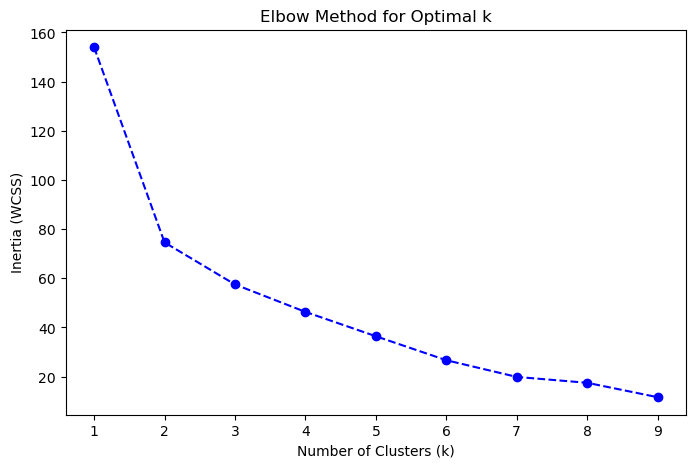

In [41]:
# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()


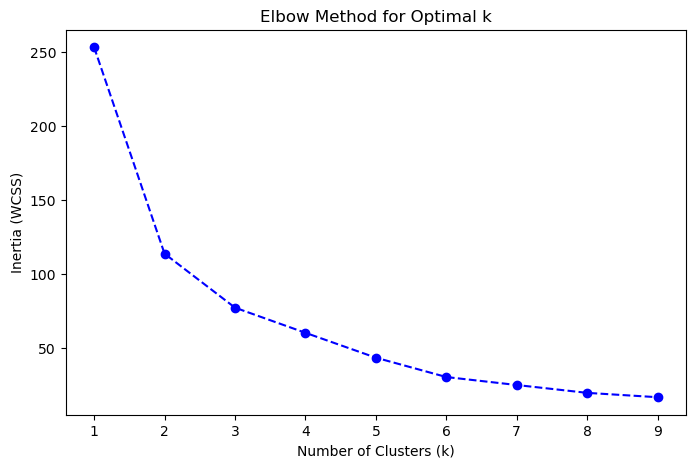

🔍 Classification Report:
              precision    recall  f1-score   support

   Elongated       0.33      0.60      0.43         5
      Normal       0.46      0.75      0.57         8
       Round       0.00      0.00      0.00         3
       Small       0.00      0.00      0.00         6

    accuracy                           0.41        22
   macro avg       0.20      0.34      0.25        22
weighted avg       0.24      0.41      0.31        22



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


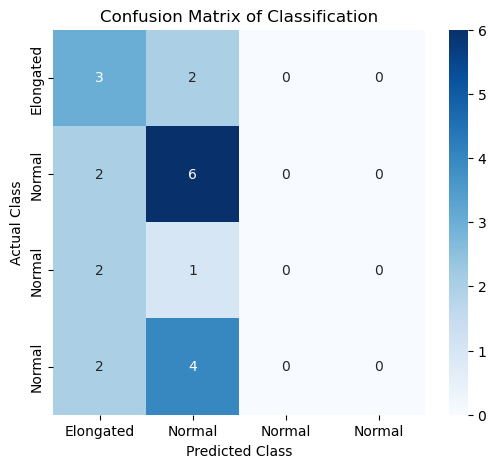

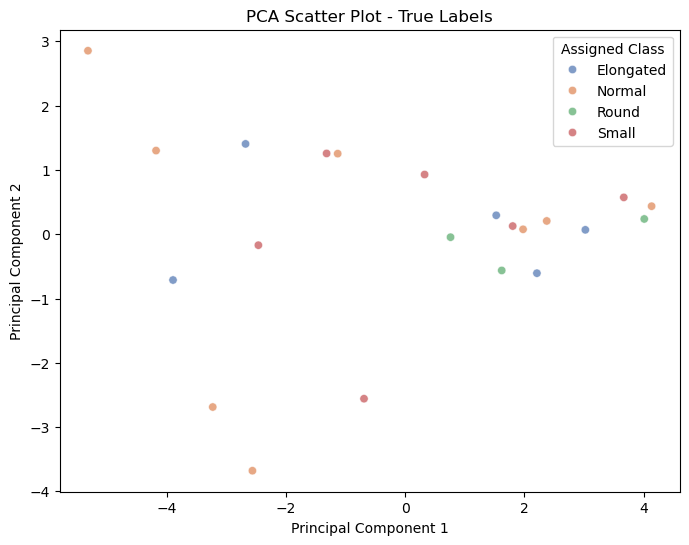

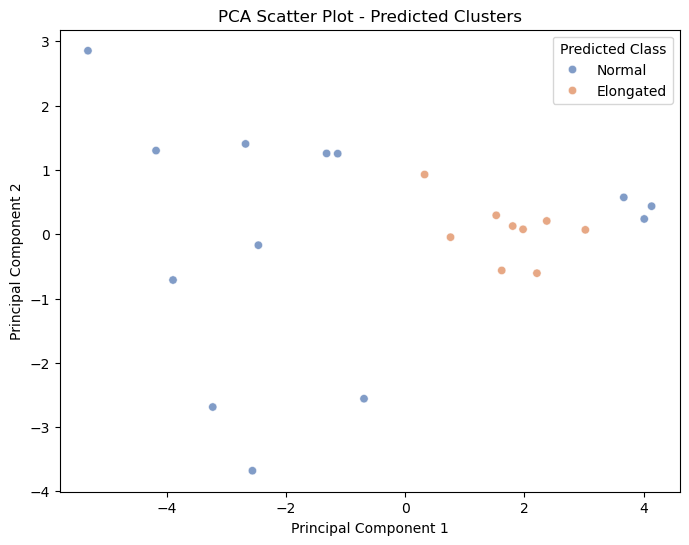

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "/Users/user/Downloads/ideal dset.xlsx"  # Change this to your file path
df = pd.read_excel(file_path)

# Features used for clustering
features = ['area', 'perimeter', 'aspect_ratio', 'circularity', 'solidity', 'equivalent_diameter', 'orientation']
X = df[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Adjust feature importance (scale down area & perimeter, scale up circularity & aspect_ratio)
X_scaled[:, features.index("area")] *= 0.5
X_scaled[:, features.index("perimeter")] *= 0.5
X_scaled[:, features.index("circularity")] *= 2
X_scaled[:, features.index("aspect_ratio")] *= 2

# Add the normalized values back to the dataframe
for i, feature in enumerate(features):
    df[f'{feature}_scaled'] = X_scaled[:, i]

# ✅ Step 1: Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

# ✅ Step 2: Train KMeans using the optimal k
optimal_k = 4  # Change this if Elbow Method suggests a different value
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# ✅ Step 3: Automatically Map Clusters to Manual Labels
# Find the most common manual label for each cluster
cluster_mapping = df.groupby('cluster')['assigned_class'].agg(lambda x: x.mode()[0])
df['classified_class'] = df['cluster'].map(cluster_mapping)

# ✅ Step 4: Evaluate Performance
print("🔍 Classification Report:")
print(classification_report(df['assigned_class'], df['classified_class']))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(df['assigned_class'], df['classified_class'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cluster_mapping.values, yticklabels=cluster_mapping.values)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix of Classification")
plt.show()

# ✅ Step 5: PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['assigned_class'], palette="deep", alpha=0.7)
plt.title("PCA Scatter Plot - True Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Assigned Class")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['classified_class'], palette="deep", alpha=0.7)
plt.title("PCA Scatter Plot - Predicted Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Predicted Class")
plt.show()


Cluster Statistics:
  cluster         area                perimeter             \
                  mean          std        mean        std   
0       0  2451.250000   721.371090  330.806133  53.539537   
1       1   385.777778   203.603032   76.804970  25.701934   
2       2   972.857143   511.049387  163.437580  52.929289   
3       3  4255.000000  1402.899854  595.691955  98.740115   

  equivalent_diameter            aspect_ratio           circularity            \
                 mean        std         mean       std        mean       std   
0           55.400981   8.307409     6.453584  1.479375    0.284818  0.070858   
1           21.381837   6.185076     1.895273  0.544810    0.797485  0.114783   
2           34.225879   8.858948     3.471104  1.247520    0.470266  0.157238   
3           73.095756  12.218408     2.529807  0.441753    0.148573  0.000422   

   solidity            
       mean       std  
0  0.776826  0.145279  
1  0.943213  0.030002  
2  0.873042  0.083651  


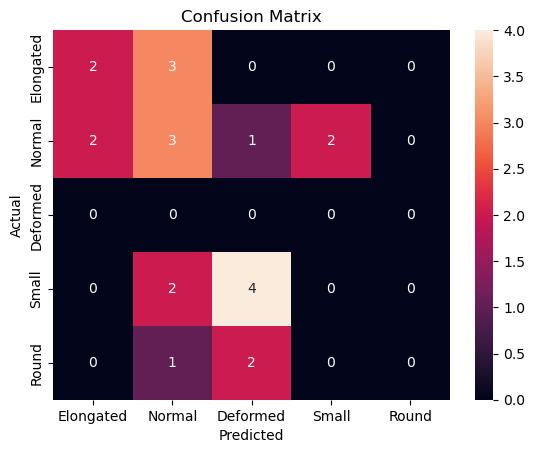

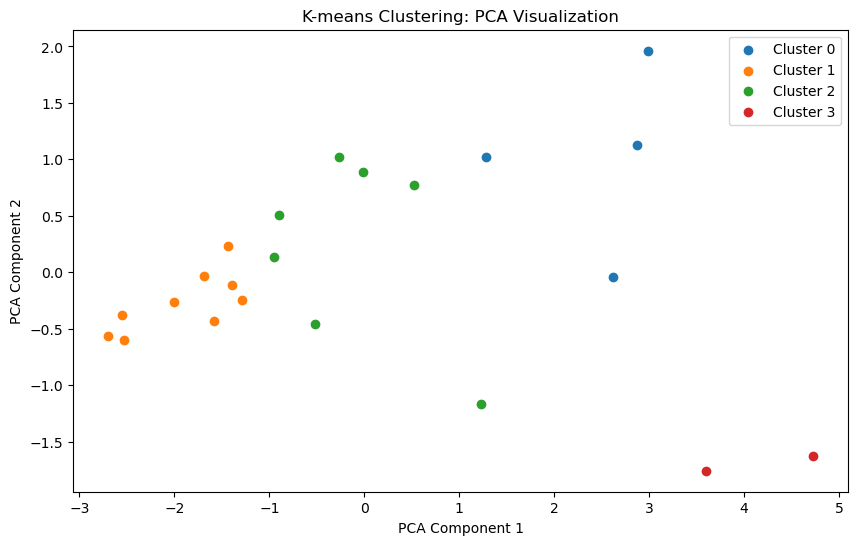

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/user/Downloads/ideal dset.xlsx"  # Change this to your actual file path
df = pd.read_excel(file_path)

# Step 1: Preprocess the data
# Select relevant features for clustering
features = ['area', 'perimeter', 'equivalent_diameter', 'aspect_ratio', 'circularity', 'solidity']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-means clustering
# Set the number of clusters (k) equal to the number of morphology classes
k = len(df['assigned_class'].unique())
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Analyze clustering results
# Calculate cluster statistics
cluster_stats = df.groupby('cluster')[features].agg(['mean', 'std']).reset_index()

# Print cluster statistics
print("Cluster Statistics:")
print(cluster_stats)

# Step 4: Map clusters to morphology classes
# Compare cluster statistics with domain knowledge to assign morphology classes
# Example mapping (adjust based on your data):
cluster_to_class = {
    0: 'Elongated',
    1: 'Normal',
    2: 'Deformed',
    3: 'Small',
    4: 'Round'
}
df['predicted_class'] = df['cluster'].map(cluster_to_class)

# Step 5: Validate the mapping
# Compare predicted classes with ground truth
accuracy = accuracy_score(df['assigned_class'], df['predicted_class'])
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(df['assigned_class'], df['predicted_class'], labels=list(cluster_to_class.values()))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=cluster_to_class.values(), yticklabels=cluster_to_class.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Visualize clusters using PCA for dimensionality reduction
# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

# Plot clusters in 2D PCA space
plt.figure(figsize=(10, 6))
for cluster in df['cluster'].unique():
    subset = df[df['cluster'] == cluster]
    plt.scatter(subset['pca_1'], subset['pca_2'], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('K-means Clustering: PCA Visualization')
plt.show()